# Bushfire Analysis using Meteorological Data
Programming Language: R 3.5.1 in Jupyter Notebook


## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

In [54]:
# Load the package *pROC*.
library(pROC)
library(ggplot2)
library(reshape2)
library(car)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(ggplot2) # for generating layered plots
library(lattice)
library(car)
library(leaps)
library(corrplot)
library(tidyverse)
library(caret) # for KNN regression
library(MASS)
library(psych)
library(dplyr) # for data aggregation and wrangling
library(tidyr) # reshaping data the tidyverve way
library(GGally) #for generating correlation plots
library(broom)
library(reshape2) # reshaping data the tidyverve way
library(glmnet) # For generating linear model with lasso regularisation
library(purrr)
library(tibble) # generate alternate of data frame.
library(corrplot)
options(warn = -1)


## 1. Introduction <a class="anchor" id="sec_1"></a>

In the notebook it contains the result of the data analysis done on the data set given for us in this assignment i,e. `forest_fire.csv` and the aim of the data analysis is to build some statistic models that can be used to predict the area burnt during the forest fires.So, in our dataset we have data from the year late 2019 to the early 2020 where Australia faced devestating bushfire crises.

Now I like to give some briefing about the Bushfire that effect our environment and also indirectly affecting the ecological balance. According to the News we can come to know that the bushfire had destroyed thousands of homes, forests, enormous amount of wild life. Therfore fast and automatic detection of bushfires is required at the earliest for succesful firefighting.

So, Here in the advanced world by using some technologies, a variety of data about the forest fire are been collected from various sources like Satellites Images, Meterological data by local sensors etc. These data contains alot of information on the forest fire.

Therefore, here in the Assignment I have been given with a forest fire data set which is taken from the Meteorological data and by analysing the data we could predict and prevent or protect the forest from these fires and the protect the animals which would help in maintaining the balance in the eco system.

The Notebook contains some EDA where i am doing some analysis on the data set on the variables one by one and then seeing for some data errors,missing data etc and then according to the EDA I am selecting the features for the model development and then I have build some of the models and also evaluated the model to check which model predicts well in this senarios.

# Importing Library

In [55]:
# Loading the dataset
forest_data <- read.csv('forestfires.csv')
#displaying the first few lines of read csv file
head(forest_data)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


**Noticing the Dimention of our dataset**

- Here we have 513 rows and 13 columns 

In [56]:
dim(forest_data)

[1] 517  13

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [57]:
cat("The forest_data has ", dim(forest_data)[1], "records, each with", dim(forest_data)[2],
    "attributes. The structure is:\n\n")
str(forest_data)

cat("\nThe first few and last few records in the dataset are:")
# Inspect the first few records
head(forest_data)
# And the last few
tail(forest_data)


cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(forest_data)

cat("The numbers of unique values for each attribute are:")
apply(forest_data, 2, function(x) length(unique(x)))

The forest_data has  517 records, each with 13 attributes. The structure is:

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...

The first few and last few records in the dataset are:

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00



Basic statistics for each attribute are:

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

The numbers of unique values for each attribute are:

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    9     7    12     7   106   215   219   119   192    75    21     7   251

## Summary from the above: -
From the above Observation I can say that there are 517 Rows and 13 columns in our dataset which is been provided. Then In the dataset we have almost all numeric columns but there are two catogorical columns whuch are month and day.
After seeing the summary of the data we can see that min, max, 1st Quadrant and  3rd Quadrant and also mean and median. we have also got the unique number in each of the columns.

Here from observing the min and max values we can come to know that there is some uncertainity for the columns like DMC,DC,ISI,RH and area so this means there a lot of variance in the data points

### plotting histograms to know the distribution: -

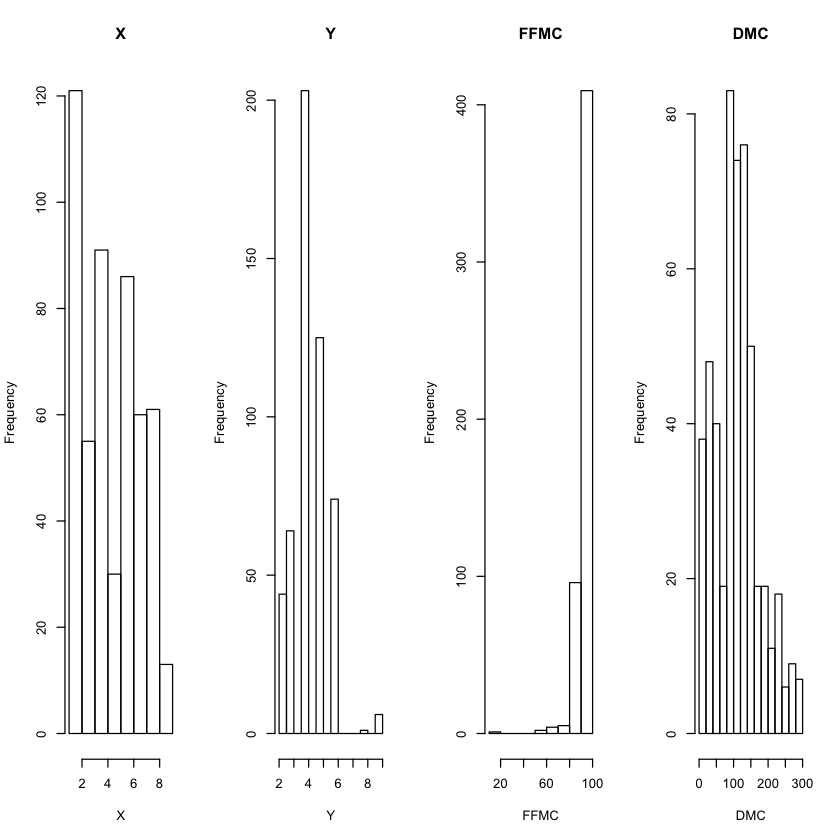

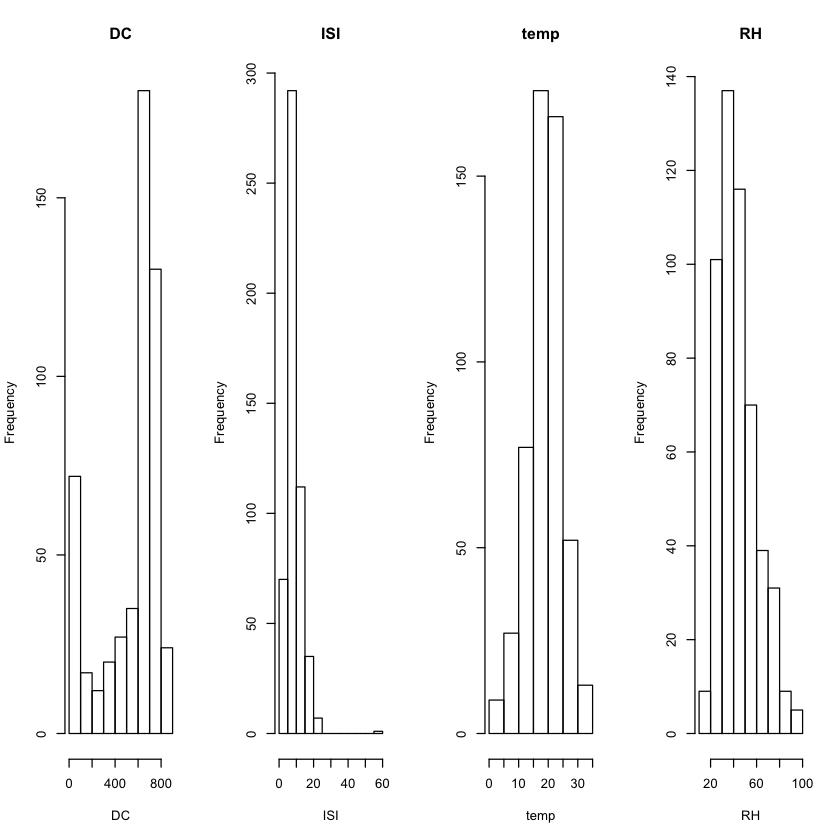

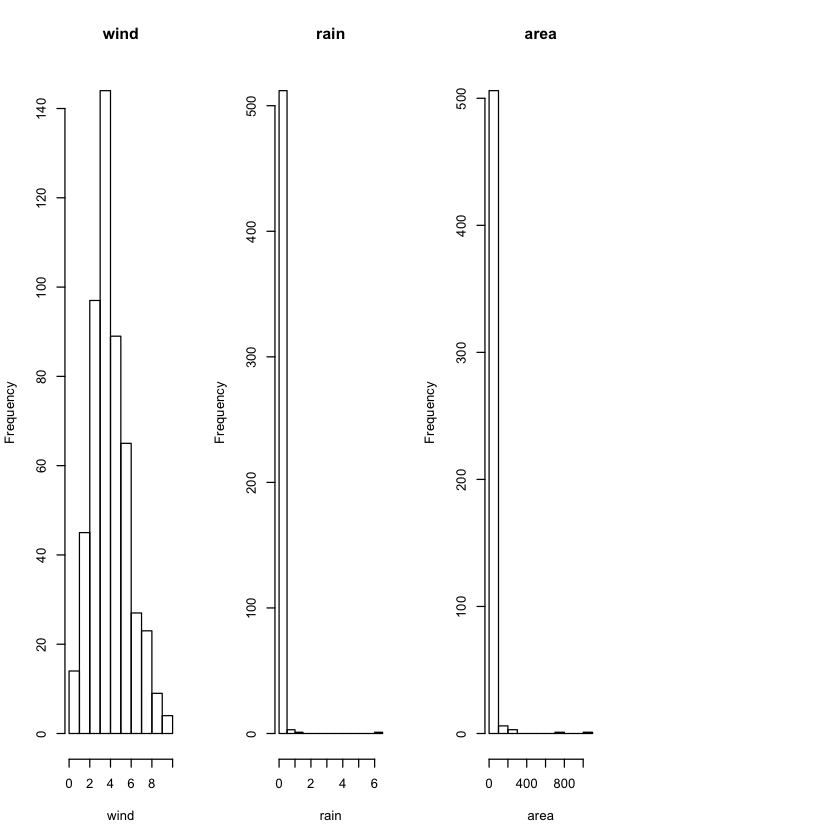

In [58]:
par(mfrow = c(1,4)) # 6 x 2 grid
for (i in 1:(length((forest_data[,c(1,2,seq(5,13))])))) {
        hist((forest_data[,c(1,2,seq(5,13))])[,i],xlab = names((forest_data[,c(1,2,seq(5,13))]))[i],main = names((forest_data[,c(1,2,seq(5,13))]))[i]) # I like blue
}

From the above histograms plotted for each variable we can see that for variables there is a normal distribution and for some of the variable its showing right scewed and for some its left scewed.

For variables which is showing normal distribution are: -
- temp 
- wind

Almost normal distribution: -
- X
- Y 
- DMC
- DC
- RH

for variables which is showing Right scewed are:-
- ISI
- areas
- rain

for variables which is showing left scewed are: -
- FFMC

In [59]:
forest_selected_data = forest_data[,c(5,8,12,13)]
# head(forest_selected_data)

### performing some transformations on the unbalanced data in the given dataset.
- Log Transformation
- Square root Transformation

#### Sqrt Transformation

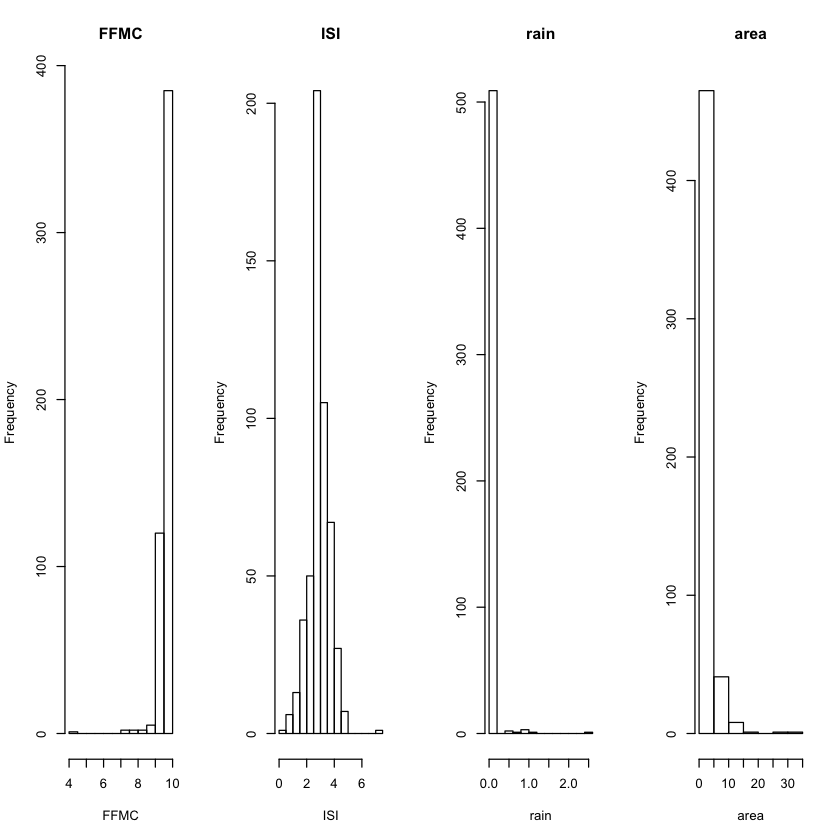

In [60]:
par(mfrow = c(1,4)) # 6 x 2 grid
for (i in 1:(length(forest_data[,c(5,8,12,13)]))){
    hist(sqrt(forest_data[,c(5,8,12,13)])[,i],xlab=names(forest_data[,c(5,8,12,13)])[i],main = names(forest_data[,c(5,8,12,13)])[i])
}

#### Log Transformation

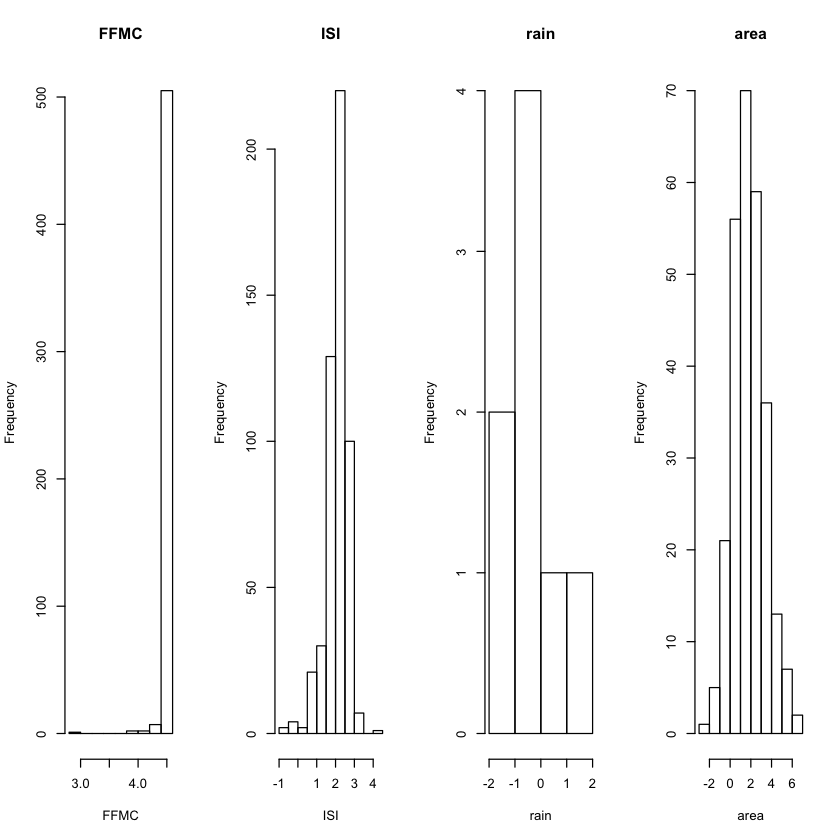

In [61]:
par(mfrow = c(1,4)) # 6 x 2 grid
for (i in 1:(length(forest_data[,c(5,8,12,13)]))){
    hist(log(forest_data[,c(5,8,12,13)])[,i],xlab=names(forest_data[,c(5,8,12,13)])[i],main = names(forest_data[,c(5,8,12,13)])[i])
}

###  Box plots for the Categorical columns

### Months column:-

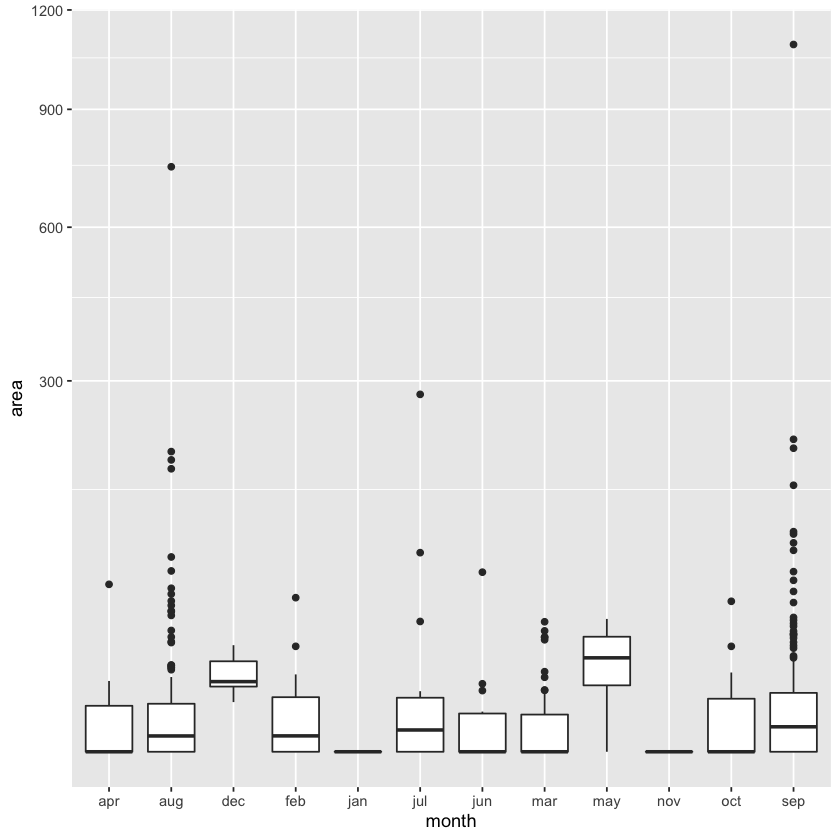

In [62]:
ggplot(forest_data, aes(x=month, y= area)) + geom_boxplot()+coord_trans(y = "sqrt")

In the above graph we can see that the observation for the some of the months are very less and even the observations are not balanced therefore it may lead to many problems like overfitting. To over come this problem i have grouped the months acoording to some seasons.

In [63]:
summary(forest_data$month)

apr aug dec feb jan jul jun mar may nov oct sep 
  9 184   9  20   2  32  17  54   2   1  15 172

In [64]:
forest_data$season <- rep("spring", 517)
for (i in 1:517){
if (forest_data$month[i] %in% c("feb","jan","dec")) forest_data$season[i] <- "winter"
if (forest_data$month[i] %in% c("oct","nov","sep")) forest_data$season[i] <- "autoumn"
if (forest_data$month[i] %in% c("aug","jul","jun")) forest_data$season[i] <- "summer"
}
forest_data$season <- as.factor(forest_data$season)

In [65]:
head(forest_data)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,spring
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,autoumn
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,autoumn
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,spring
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,spring
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0,summer


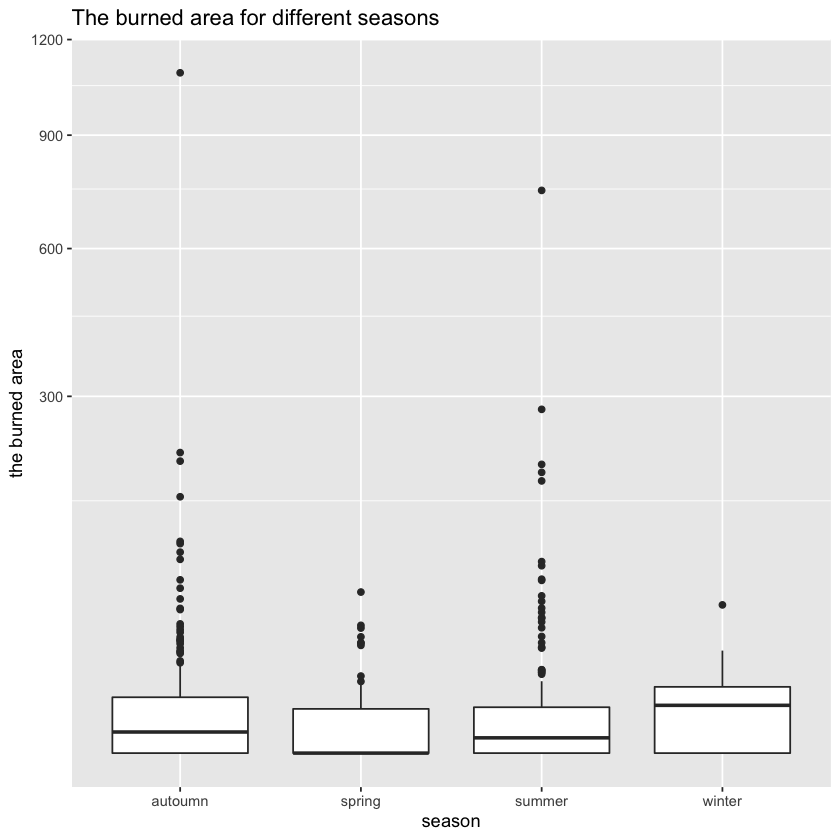

In [66]:
ggplot(forest_data, aes(forest_data$season, forest_data$area)) + geom_boxplot() + coord_trans(y = "sqrt") + 
labs(x = "season", y = "the burned area", title ="The burned area for different seasons")

### Days : -

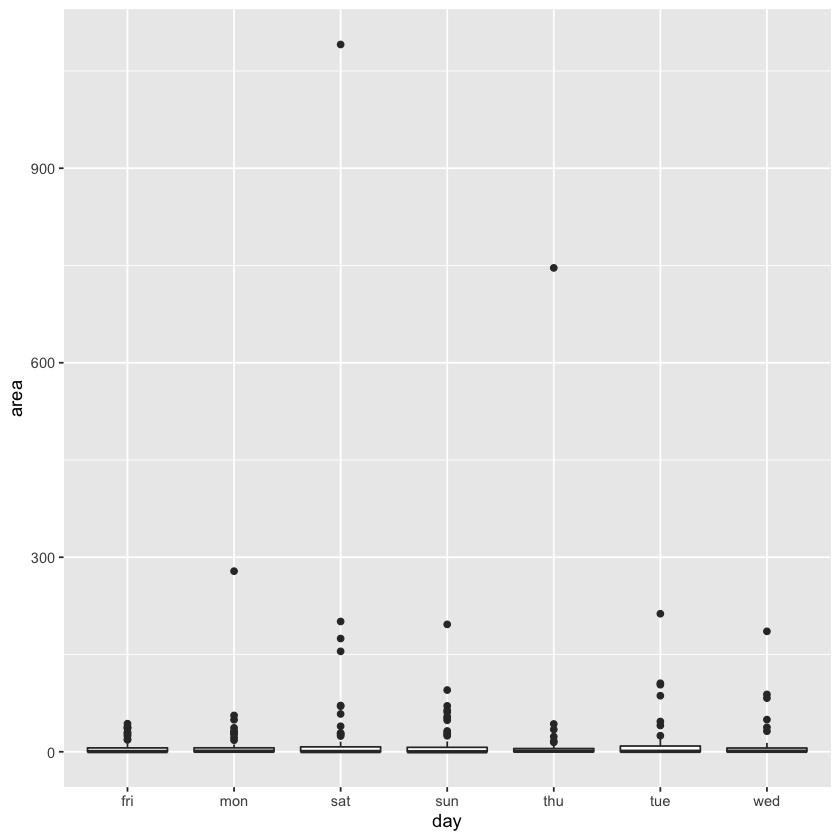

In [67]:
ggplot(forest_data, aes(x=day, y= area)) + geom_boxplot()

## Plotting BOX plot for each variable

No id variables; using all as measure variables


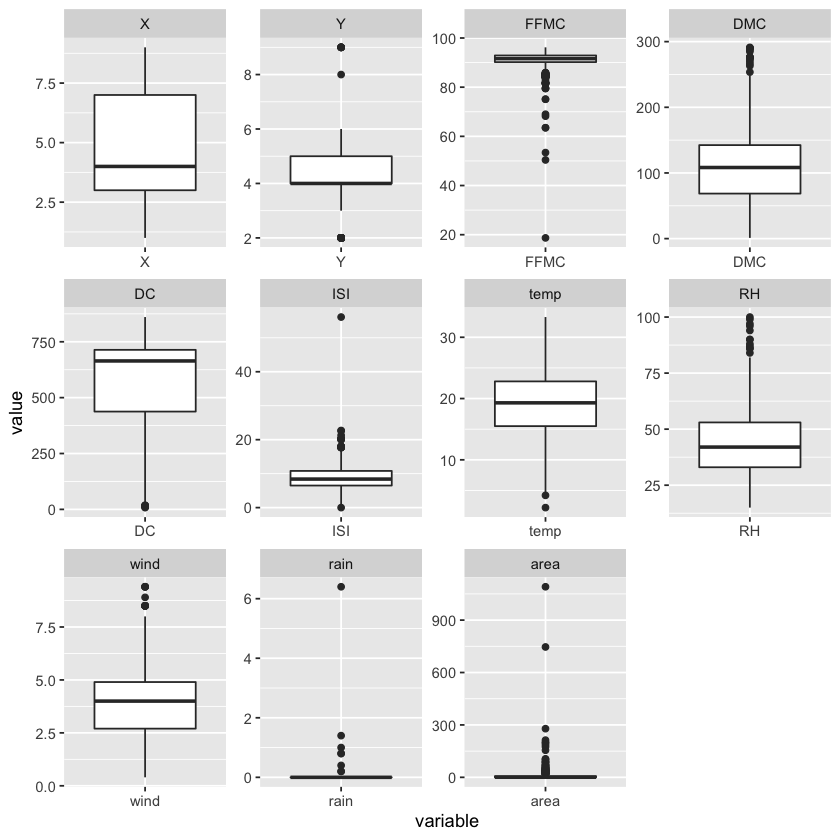

In [68]:
m1 <- melt(as.data.frame(forest_data[,c(1,2,seq(5,13))]))
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot()+
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

From the above graphs, we can see that there exists a number of outliers for the following: -
- FFMC
- RH
- rain
- area

The size of the boxplots gives the uncertainity.

Therfore by observing the two transformation i,e. the log and the squareroot we could see that log transformation is making some changes to the area column so by this i can conclude by doing the log transformation on the area column.

### Apply log transformation on the area column

In [69]:
attach(forest_data)
forest_data$logarea <- ifelse(area > 0, log(area), 1)

The following objects are masked from data_after_transformation:

    DC, DMC, FFMC, ISI, RH, X, Y, day, month, rain, temp, wind

The following objects are masked from forest_data (pos = 5):

    DC, DMC, FFMC, ISI, RH, X, Y, area, day, month, rain, season, temp,
    wind



In [70]:
head(forest_data)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season,logarea
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,spring,1
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,autoumn,1
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,autoumn,1
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,spring,1
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,spring,1
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0,summer,1


In [71]:
data_after_transformation<-forest_data[,-c(13,14)]

In [72]:
head(data_after_transformation)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,1


The following objects are masked from forest_data (pos = 3):

    DC, DMC, FFMC, ISI, RH, X, Y, day, month, rain, temp, wind

The following objects are masked from data_after_transformation (pos = 5):

    DC, DMC, FFMC, ISI, RH, X, Y, day, logarea, month, rain, temp, wind

The following objects are masked from forest_data (pos = 6):

    DC, DMC, FFMC, ISI, RH, X, Y, day, month, rain, temp, wind

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


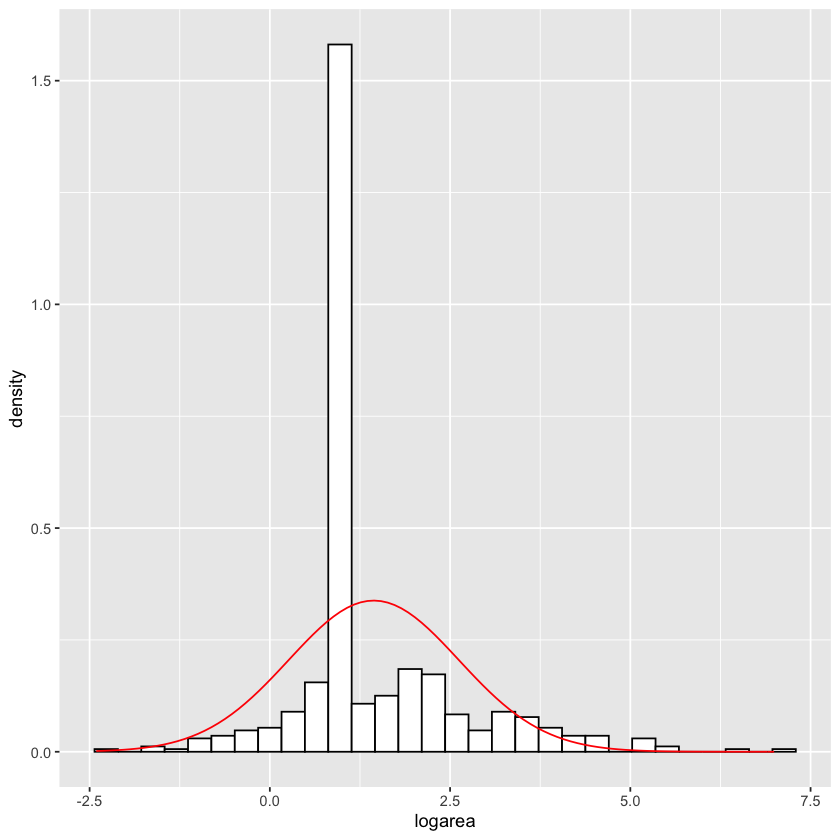

In [73]:
attach(data_after_transformation)
ggplot(data_after_transformation, aes(x = logarea)) + 
geom_histogram(aes(y = ..density..), colour = "black", fill = "White") +
stat_function(fun = dnorm, args = list(mean = mean(logarea,na.rm=TRUE), sd = sd(logarea,na.rm=TRUE)),col = 'red')

###   outliers

### Correlation

A scatter plot is a plot which is used to show the relationships between the variables in the dataset. It can also be used to show how it is affecting the other variable and how much it is affecting.

Here the correlation can be classified as follows:-
- Positive corelation
- negative corelation
- no corelation

In positive corelation as  one of the variable increases the other variable also increases.
In negative corelation as  one of the variable increases the other variable decreases.
In no corelation as one of the variable increases the other variable will either increase or decreaase.




### Corelation Matrix for numerical values

In [74]:
cor(data_after_transformation[,c(1,2,seq(5,13))])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
X,1.000000000,0.539548171,-0.021039272,-0.048384178,-0.08591612,0.006209941,-0.051258262,0.08522319,0.01879782,0.06538717,0.036133892
Y,0.539548171,1.000000000,-0.046307546,0.007781561,-0.10117777,-0.024487992,-0.024103084,0.06222073,-0.02034085,0.03323410,0.012836453
FFMC,-0.021039272,-0.046307546,1.000000000,0.382618800,0.33051180,0.531804931,0.431532259,-0.30099542,-0.02848481,0.05670153,0.005834136
DMC,-0.048384178,0.007781561,0.382618800,1.000000000,0.68219161,0.305127835,0.469593844,0.07379494,-0.10534225,0.07478998,0.041605106
DC,-0.085916123,-0.101177767,0.330511795,0.682191612,1.00000000,0.229154169,0.496208053,-0.03919165,-0.20346569,0.03586086,0.016439034
ISI,0.006209941,-0.024487992,0.531804931,0.305127835,0.22915417,1.000000000,0.394287104,-0.13251718,0.10682589,0.06766819,-0.054854541
temp,-0.051258262,-0.024103084,0.431532259,0.469593844,0.49620805,0.394287104,1.000000000,-0.52739034,-0.22711622,0.06949055,0.002456504
RH,0.085223194,0.062220731,-0.300995416,0.073794941,-0.03919165,-0.132517177,-0.527390339,1.00000000,0.06941007,0.09975122,-0.043691232
wind,0.018797818,-0.020340852,-0.028484809,-0.105342253,-0.20346569,0.106825888,-0.227116220,0.06941007,1.00000000,0.06111888,0.058688765
rain,0.065387168,0.033234103,0.056701533,0.074789982,0.03586086,0.067668190,0.069490547,0.09975122,0.06111888,1.00000000,0.019880627


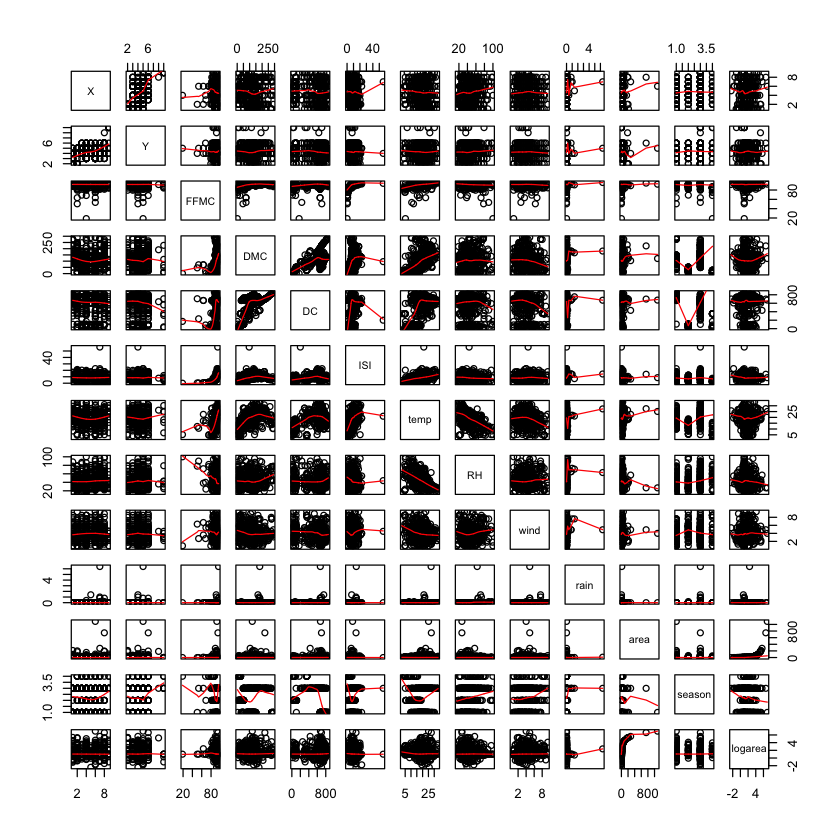

In [75]:
# forest_data[,c(1,2,seq(5,15))]
pairs(forest_data[,c(1,2,seq(5,15))], panel = panel.smooth)

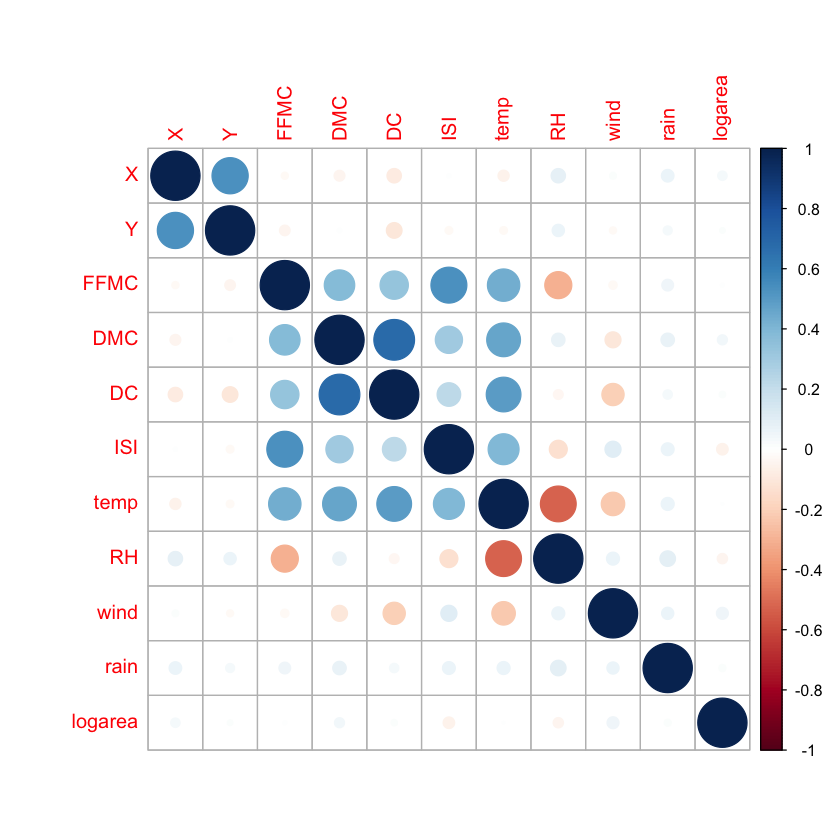

In [76]:
corrplot(cor(data_after_transformation[,c(1,2,5,6,7,8,9,10,11,12,13)]))

Here in the above graph we can see that there is a positive corelation between the DMC and DC and there is negative corelation between RH and temp.
- here the Red bubble infer the negative corelation
- then the Blue bubble infer the positive corelation

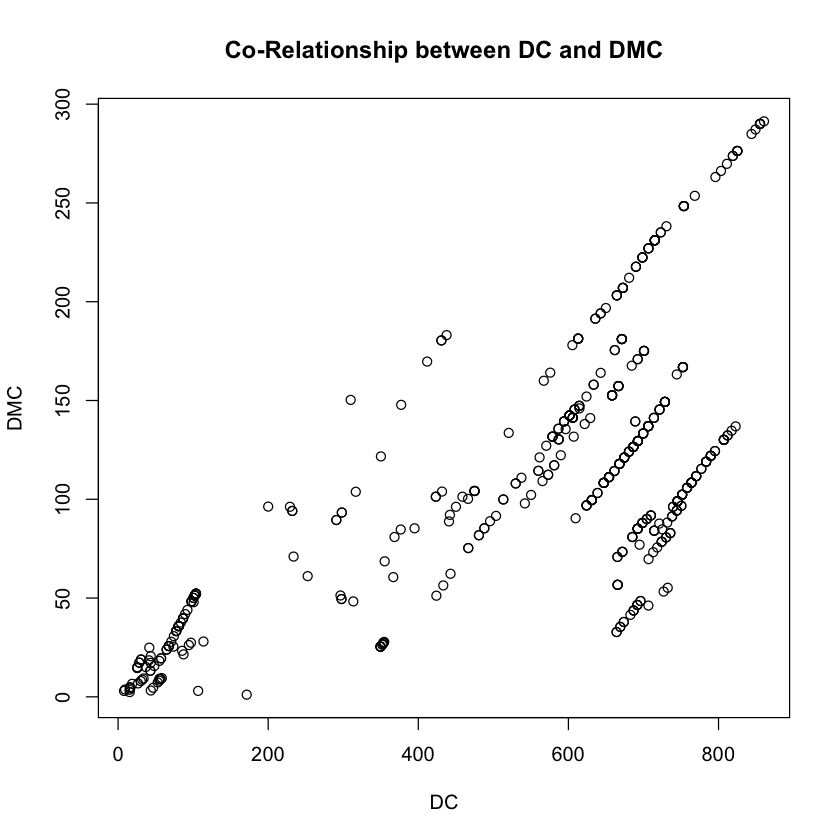

In [77]:
plot(DC,DMC, xlab = "DC", ylab = "DMC", main = "Co-Relationship between DC and DMC")

Here from both these we can differentiate the corelated and non corelated variables using a scatter plot

### Insights from the above:-

from the above corelation matrix we can say the following: -
- RH and ISI are having negative corelation w.r.t the variable logarea.
- wind has the highest positive corelation value.
- the good corelation value is observed when the value is around 0.5 and so for negative its less than 0.
Due to high positive corelation value of the wind we can say that wind influences more and then the rest i,e.  "DMC", "X", "DC", "y", "FFMC", "temp".
- since the data given is small the corelation values are less for all.
- here finally i am saying that "wind", "DMC", "X", "DC", "Y" are the variables influencing the logarea variable.
So, these parameters are used further to build our Machine Learning models.

## 3. Model Development<a class="anchor" id="sec_3"></a>

#### Dividing the dataset as Training and testing data as 80% and 20%

In [78]:
head(data_after_transformation)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,1
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,1
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,1
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,1


In [79]:
set.seed(110)
#shuffling the data to reduce the bias
data_split <- sample(nrow(data_after_transformation) , 0.80*nrow(data_after_transformation), replace = FALSE)
train_data <- data_after_transformation[data_split,]
test_data <- data_after_transformation[-data_split,]

In [80]:
head(train_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
340,2,4,sep,mon,91.6,108.4,764.0,6.2,20.4,41,1.8,0,0.3852624
435,1,4,aug,fri,90.6,269.8,811.2,5.5,22.2,45,3.6,0,1.0000000
489,4,4,aug,tue,95.1,141.3,605.8,17.7,19.4,71,7.6,0,3.8437442
336,4,3,sep,mon,91.6,108.4,764.0,6.2,9.8,86,1.8,0,1.0000000
355,7,4,sep,fri,92.1,99.0,745.3,9.6,18.7,50,2.2,0,1.7867469
361,6,5,sep,fri,92.5,122.0,789.7,10.2,18.4,42,2.2,0,0.0861777


In [81]:
head(test_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,logarea
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,1
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0,1
14,6,5,sep,mon,90.9,126.5,686.5,7.0,21.3,42,2.2,0,1
15,6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,1
17,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,1
22,5,4,sep,mon,91.8,78.5,724.3,9.2,19.1,38,2.7,0,1


# Building a Linear Model

In this task, we are going to build a multiple linear regression model to predict <font color='orange'>area</font> by using all the other variables as predictors. By interpreting the results given by the summary. yeah there is a relation between the predictors and the response.

Then here we are building models to get the best rmsc values.

### Model 1 - considering all the parameters

In [82]:
linear_model_trail_1 = lm(logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain , data = train_data)
summary(linear_model_trail_1)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8581 -0.5384 -0.3774  0.4711  5.4371 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.346e+00  1.243e+00   1.083    0.280
X            2.948e-02  2.959e-02   0.996    0.320
Y            3.132e-03  5.603e-02   0.056    0.955
FFMC         2.298e-03  1.298e-02   0.177    0.860
DMC          8.922e-04  1.367e-03   0.653    0.514
DC           3.373e-06  3.377e-04   0.010    0.992
ISI         -2.288e-02  1.555e-02  -1.472    0.142
temp        -5.967e-03  1.563e-02  -0.382    0.703
RH          -5.434e-03  4.835e-03  -1.124    0.262
wind         4.738e-02  3.443e-02   1.376    0.170
rain        -5.262e-01  7.673e-01  -0.686    0.493

Residual standard error: 1.161 on 402 degrees of freedom
Multiple R-squared:  0.01823,	Adjusted R-squared:  -0.00619 
F-statistic: 0.7465 on 10 and 402 DF,  p-value: 0

### Model 2 for linear Regression

In [83]:
summary(lm(logarea ~ X + Y + DMC + DC + wind , data = train_data))


Call:
lm(formula = logarea ~ X + Y + DMC + DC + wind, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8995 -0.5019 -0.3892  0.4790  5.5274 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.173e+00  3.134e-01   3.742 0.000209 ***
X            2.152e-02  2.928e-02   0.735 0.462908    
Y            4.849e-03  5.591e-02   0.087 0.930931    
DMC          7.752e-06  1.229e-03   0.006 0.994971    
DC          -4.819e-06  3.262e-04  -0.015 0.988221    
wind         3.591e-02  3.295e-02   1.090 0.276481    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.162 on 407 degrees of freedom
Multiple R-squared:  0.005455,	Adjusted R-squared:  -0.006763 
F-statistic: 0.4465 on 5 and 407 DF,  p-value: 0.8158


### Model 3 for linear Regression

In [84]:
summary(lm(logarea ~ X + Y + FFMC + DMC + DC + temp + wind + rain , data = train_data))


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + temp + wind + 
    rain, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9202 -0.5076 -0.3859  0.4780  5.5216 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.330e+00  1.008e+00   1.319    0.188
X            2.471e-02  2.956e-02   0.836    0.404
Y            4.237e-03  5.617e-02   0.075    0.940
FFMC        -2.138e-03  1.150e-02  -0.186    0.853
DMC          2.114e-04  1.292e-03   0.164    0.870
DC          -1.194e-06  3.365e-04  -0.004    0.997
temp        -4.588e-04  1.235e-02  -0.037    0.970
wind         3.961e-02  3.376e-02   1.173    0.241
rain        -7.776e-01  7.519e-01  -1.034    0.302

Residual standard error: 1.164 on 404 degrees of freedom
Multiple R-squared:  0.008223,	Adjusted R-squared:  -0.01142 
F-statistic: 0.4187 on 8 and 404 DF,  p-value: 0.9097


### Model 4 - fitting model for lower p value 

In [85]:
summary(lm(logarea ~ wind + ISI , data = train_data))


Call:
lm(formula = logarea ~ wind + ISI, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8056 -0.5033 -0.3975  0.4783  5.5566 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.43455    0.17082   8.398 7.49e-16 ***
wind         0.04184    0.03184   1.314    0.190    
ISI         -0.01905    0.01248  -1.527    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.155 on 410 degrees of freedom
Multiple R-squared:  0.008927,	Adjusted R-squared:  0.004092 
F-statistic: 1.846 on 2 and 410 DF,  p-value: 0.1591


### Model 5 - using step function, which shows lower AIC value 

In [86]:
step(linear_model_trail_1)

Start:  AIC=134.47
logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

       Df Sum of Sq    RSS    AIC
- DC    1   0.00013 542.28 132.47
- Y     1   0.00422 542.28 132.48
- FFMC  1   0.04225 542.32 132.51
- temp  1   0.19667 542.48 132.62
- DMC   1   0.57444 542.85 132.91
- rain  1   0.63428 542.91 132.96
- X     1   1.33923 543.62 133.49
- RH    1   1.70381 543.98 133.77
- wind  1   2.55443 544.83 134.41
<none>              542.28 134.47
- ISI   1   2.92118 545.20 134.69

Step:  AIC=132.47
logarea ~ X + Y + FFMC + DMC + ISI + temp + RH + wind + rain

       Df Sum of Sq    RSS    AIC
- Y     1   0.00408 542.28 130.48
- FFMC  1   0.04260 542.32 130.51
- temp  1   0.20626 542.49 130.63
- rain  1   0.63545 542.91 130.96
- DMC   1   0.79377 543.07 131.08
- X     1   1.33949 543.62 131.49
- RH    1   1.71666 544.00 131.78
- wind  1   2.59805 544.88 132.45
<none>              542.28 132.47
- ISI   1   2.93888 545.22 132.71

Step:  AIC=130.48
logarea ~ X + FFMC + DMC + 


Call:
lm(formula = logarea ~ 1, data = train_data)

Coefficients:
(Intercept)  
      1.437  


## model 6 - using the influence variables

In [87]:
model_fit_linear_2 = lm(logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + DMC:DC , data = train_data)
summary(model_fit_linear_2)


Call:
lm(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + DMC:DC, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8474 -0.5356 -0.3810  0.4602  5.4393 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.398e+00  1.254e+00   1.115    0.266
X            2.980e-02  2.964e-02   1.005    0.315
Y            1.747e-03  5.624e-02   0.031    0.975
FFMC         1.627e-03  1.315e-02   0.124    0.902
DMC          2.447e-03  4.765e-03   0.513    0.608
DC           9.019e-05  4.234e-04   0.213    0.831
ISI         -2.419e-02  1.603e-02  -1.509    0.132
temp        -7.770e-03  1.652e-02  -0.470    0.638
RH          -5.695e-03  4.901e-03  -1.162    0.246
wind         4.712e-02  3.448e-02   1.367    0.173
rain        -5.216e-01  7.683e-01  -0.679    0.498
DMC:DC      -2.071e-06  6.083e-06  -0.341    0.734

Residual standard error: 1.163 on 401 degrees of freedom
Multiple R-squared:  0.01852,	Adjusted R-squared: 

### Model 7 for the highest corelation value variable

In [88]:
model_fit_linear_3 = lm(logarea ~ wind, data = train_data)
summary(model_fit_linear_3)


Call:
lm(formula = logarea ~ wind, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8941 -0.4862 -0.4011  0.4718  5.5603 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.28649    0.14085   9.134   <2e-16 ***
wind         0.03697    0.03173   1.165    0.245    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.157 on 411 degrees of freedom
Multiple R-squared:  0.003293,	Adjusted R-squared:  0.0008676 
F-statistic: 1.358 on 1 and 411 DF,  p-value: 0.2446


In [89]:
model_fit_linear_4 = lm(logarea ~ DMC+ISI, data = train_data)
summary(model_fit_linear_4)


Call:
lm(formula = logarea ~ DMC + ISI, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7659 -0.4866 -0.4135  0.4414  5.5522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.5764314  0.1410929  11.173   <2e-16 ***
DMC          0.0001854  0.0009349   0.198    0.843    
ISI         -0.0181868  0.0130467  -1.394    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.158 on 410 degrees of freedom
Multiple R-squared:  0.004847,	Adjusted R-squared:  -7.202e-06 
F-statistic: 0.9985 on 2 and 410 DF,  p-value: 0.3693


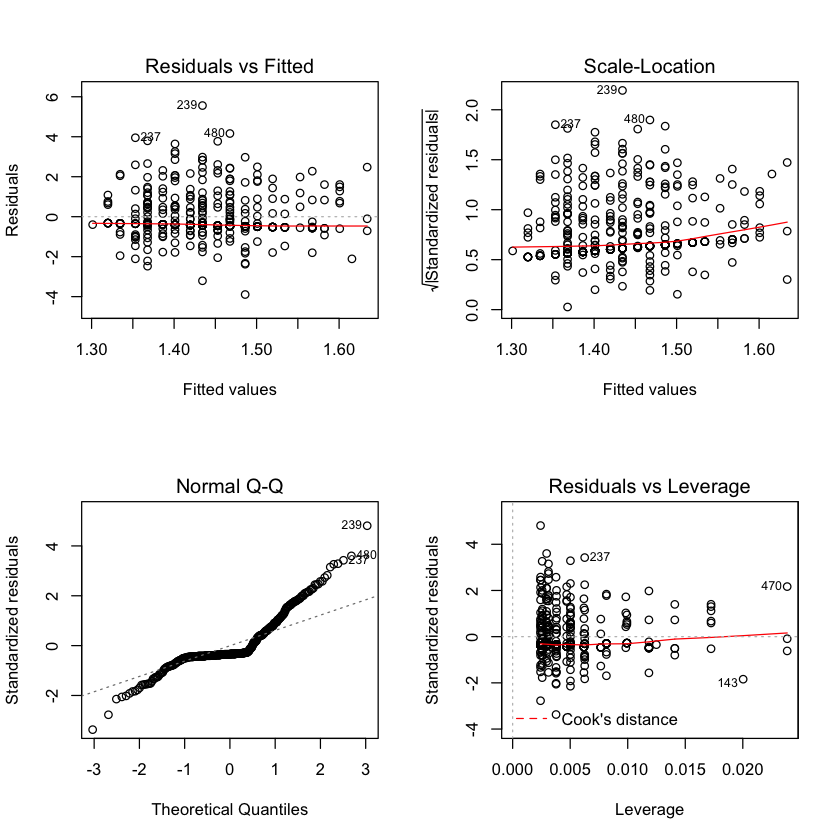

In [90]:
par(mfcol=c(2,2))
plot(model_fit_linear_3)

- The **residual vs fitted plot**: This plot is used to check the linear assumption.
- The normal **Q-Q plot**: The Q-Q plot (i.e., quantile-quantile plot) is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal
- The **scale-location plot**: It is used to check the assumption of equal variance by showing if residuals are spread equally along the ranges of predictors.
- The **residual-leverage plot**: it helps us identify influential data samples. Not all outliers are influential in linear regression analysis

In [91]:
predict_lm_1 <- predict(linear_model_trail_1, test_data)
predict_lm_2 <- predict(model_fit_linear_2, test_data)
predict_lm_3 <- predict(model_fit_linear_3, test_data)
predict_lm_4 <- predict(model_fit_linear_4, test_data)

In [92]:
head(predict_lm_1)

5        6       14       15       17       22 
1.111527 1.519844 1.451252 1.604269 1.592450 1.386222

In [93]:
head(predict_lm_2)

5        6       14       15       17       22 
1.116039 1.524518 1.454390 1.597292 1.588264 1.382609

In [94]:
head(predict_lm_3)

5        6       14       15       17       22 
1.353045 1.486150 1.367835 1.452874 1.486150 1.386321

In [95]:
head(predict_lm_4)

5        6       14       15       17       22 
1.411351 1.324903 1.472582 1.433832 1.441213 1.423670

In [96]:
rmse_error_1 <- mean((test_data$logarea - predict_lm_1)^2)
rmse_error_2 <- mean((test_data$logarea - predict_lm_2)^2)
rmse_error_3 <- mean((test_data$logarea - predict_lm_3)^2)
rmse_error_4 <- mean((test_data$logarea - predict_lm_4)^2)

In [97]:
rmse_error_1

[1] 1.744551

In [98]:
rmse_error_2

[1] 1.743945

In [99]:
rmse_error_3

[1] 1.596961

In [100]:
rmse_error_4

[1] 1.601901

By seeing the values we can say that the most important variable which is influencing the variables is **wind** as **model 3** 

# Random Forest

In [101]:
require(randomForest)

### Model 1 for Random forest

In [102]:
rf_1 <- randomForest( logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain , data = train_data)
rf_1


Call:
 randomForest(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI +      temp + RH + wind + rain, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 1.42893
                    % Var explained: -6.84

### Model 2 for Random forest

In [103]:
rf_2 <- randomForest( logarea ~ X + Y + DMC + DC + wind, data = train_data)

In [104]:
rf_2


Call:
 randomForest(formula = logarea ~ X + Y + DMC + DC + wind, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.381447
                    % Var explained: -3.29

### Model 3 - for influencing variable

In [105]:
rf_3 <- randomForest( logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain + DMC:DC, data = train_data)
rf_3


Call:
 randomForest(formula = logarea ~ X + Y + FFMC + DMC + DC + ISI +      temp + RH + wind + rain + DMC:DC, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 1.418164
                    % Var explained: -6.04

### Model 4 - Top 5 important variables

In [106]:
rf_4 <- randomForest( logarea ~ DMC + DC + ISI + temp + RH, data = train_data)
rf_4


Call:
 randomForest(formula = logarea ~ DMC + DC + ISI + temp + RH,      data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.411745
                    % Var explained: -5.56

### Model 5 - Top 3 important variables

In [107]:
rf_5 <- randomForest( logarea ~ DMC + temp + RH, data = train_data)
rf_5


Call:
 randomForest(formula = logarea ~ DMC + temp + RH, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.484636
                    % Var explained: -11.01

### Model 6 - Top 2 important variables

In [108]:
rf_6 <- randomForest( logarea ~ DMC + temp, data = train_data)
rf_6


Call:
 randomForest(formula = logarea ~ DMC + temp, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.469064
                    % Var explained: -9.84

### Model 7 - most important variables

In [109]:
rf_7 <- randomForest( logarea ~ temp, data = train_data)
rf_7


Call:
 randomForest(formula = logarea ~ temp, data = train_data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1.659004
                    % Var explained: -24.05

In [110]:
pred_1 = predict(rf_1, test_data)
pred_2 = predict(rf_2, test_data)
pred_3 = predict(rf_3, test_data)
pred_4 = predict(rf_4, test_data)
pred_5 = predict(rf_5, test_data)
pred_6 = predict(rf_6, test_data)
pred_7 = predict(rf_7, test_data)

In [111]:
rmse_error_rf_1 <- mean((test_data$logarea - pred_1)^2)
rmse_error_rf_2 <- mean((test_data$logarea - pred_2)^2)
rmse_error_rf_3 <- mean((test_data$logarea - pred_3)^2)
rmse_error_rf_4 <- mean((test_data$logarea - pred_4)^2)
rmse_error_rf_5 <- mean((test_data$logarea - pred_5)^2)
rmse_error_rf_6 <- mean((test_data$logarea - pred_6)^2)
rmse_error_rf_7 <- mean((test_data$logarea - pred_7)^2)

In [112]:
rmse_error_rf_2

[1] 1.721913

From the above values we can see that the rf model 2 is the best among others and the variables influencing are as follows:-
- DMC 
- DC
- ISI
- temp 
- RH

# Gradient Boosting Model

In [113]:
library(gbm)

Loaded gbm 2.1.5


In [114]:
fitControl <- trainControl(method = "repeatedcv", number = 20, repeats = 4)

In [115]:
gbm_fit1 <- train(logarea ~ X + Y + FFMC + DMC + DC + ISI + temp + RH + wind + rain , data = train_data, method = "gbm", trControl = fitControl, verbose = FALSE)
gbm_fit1

Stochastic Gradient Boosting 

413 samples
 10 predictor

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 4 times) 
Summary of sample sizes: 391, 392, 393, 393, 393, 392, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared    MAE      
  1                   50      1.156831  0.04326413  0.8593057
  1                  100      1.169364  0.04598301  0.8676673
  1                  150      1.176816  0.05027162  0.8703488
  2                   50      1.165316  0.04345520  0.8632059
  2                  100      1.191751  0.05254309  0.8778066
  2                  150      1.204794  0.04976361  0.8907605
  3                   50      1.180269  0.04788780  0.8713890
  3                  100      1.198902  0.04600467  0.8850329
  3                  150      1.209140  0.04410484  0.8947041

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE 

In [116]:
gbm_fit2 <- train(logarea ~ X + Y + DMC + DC + wind , data = train_data, method = "gbm", trControl = fitControl, verbose = FALSE)
gbm_fit2

Stochastic Gradient Boosting 

413 samples
  5 predictor

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 4 times) 
Summary of sample sizes: 392, 392, 391, 393, 392, 393, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared    MAE      
  1                   50      1.148613  0.04560192  0.8578766
  1                  100      1.153025  0.05469077  0.8580831
  1                  150      1.154223  0.05249133  0.8567112
  2                   50      1.153085  0.04736373  0.8565544
  2                  100      1.161233  0.05841233  0.8621528
  2                  150      1.172273  0.05348475  0.8693297
  3                   50      1.165114  0.04944667  0.8616227
  3                  100      1.177689  0.05097443  0.8731487
  3                  150      1.188217  0.05885280  0.8828047

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE 

In [117]:
gbm_fit3 <- train(logarea ~ wind , data = train_data, method = "gbm", trControl = fitControl, verbose = FALSE)
gbm_fit3

Stochastic Gradient Boosting 

413 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (20 fold, repeated 4 times) 
Summary of sample sizes: 393, 392, 392, 393, 392, 391, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared    MAE      
  1                   50      1.137968  0.05768463  0.8468296
  1                  100      1.141276  0.05622095  0.8466673
  1                  150      1.143148  0.05392869  0.8464080
  2                   50      1.144509  0.05376813  0.8484700
  2                  100      1.147918  0.05407385  0.8538050
  2                  150      1.148651  0.05765873  0.8527660
  3                   50      1.146918  0.05180371  0.8512973
  3                  100      1.150810  0.05298263  0.8553936
  3                  150      1.150159  0.05388897  0.8532068

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE 

In [118]:
pred_gbm_1 = predict(gbm_fit1, test_data)
pred_gbm_2 = predict(gbm_fit2, test_data)
pred_gbm_3 = predict(gbm_fit3, test_data)

In [119]:
rmse_error_gbm_1 <- mean((test_data$logarea - pred_gbm_1)^2)
rmse_error_gbm_2 <- mean((test_data$logarea - pred_gbm_2)^2)
rmse_error_gbm_3 <- mean((test_data$logarea - pred_gbm_3)^2)

In [120]:
rmse_error_gbm_1

[1] 1.554334

Here we can see that the model 3 is fitting good and all variables is the important variable at modle 1

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

#### linear Regression

The RMSC Values of Linear Regression is less at modle 3

In [121]:
rmse_error_3

[1] 1.596961

#### Random forest

The RMSC Values of random forest is less at modle 2

In [122]:
rmse_error_rf_2

[1] 1.721913

#### GBT

The RMSC Values of GBT is less at modle 1

In [123]:
rmse_error_gbm_1

[1] 1.554334

**So by comparing these Rms Value we can say that the model GBT is good**

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In the EDA we have found that are:-
- wind
- DMC
- DC
- Y
- X
- temp 

According to the model built above we can say that the influencing variables with respect to Logarea are as follows:-

**According to the model GBT**
- DMC
- DC
- ISI
- temp
- RH
- X
- Y
- wind


## 6. Conclusion <a class="anchor" id="sec_6"></a>

According to the EDA we have detected some variables which are influencing on the target variable and the GBT model is providing with somw of the variable which are influencing the target variable. Then by comparing the models w.r.t RMSE we can say that the GBT model is the best model.
By observing the above EDA and the models built we can conclude that GBT works better for the smaller datasets and also in this case.